In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
cov = pd.read_csv("/content/covid_symptoms (1).csv")

In [ ]:
cov.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,1.0,0.0,0.0,0.0,0.0,0.0,No,Male,Other
1,1.0,1.0,0.0,0.0,0.0,0.0,No,Male,Abroad
2,0.0,1.0,0.0,0.0,0.0,0.0,Yes,Male,Contact with confirmed
3,1.0,1.0,0.0,0.0,0.0,1.0,Yes,Male,Abroad
4,1.0,0.0,0.0,0.0,0.0,0.0,Yes,Female,Contact with confirmed


In [ ]:
cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211429 entries, 0 to 211428
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   cough                211186 non-null  float64
 1   fever                211186 non-null  float64
 2   sore_throat          211186 non-null  float64
 3   shortness_of_breath  211186 non-null  float64
 4   head_ache            211186 non-null  float64
 5   corona_result        211186 non-null  float64
 6   age_60_and_above     211186 non-null  object 
 7   gender               206058 non-null  object 
 8   test_indication      211186 non-null  object 
dtypes: float64(6), object(3)
memory usage: 14.5+ MB


In [ ]:
cov.shape

(211429, 9)

In [ ]:
cov.isna().sum()

cough                   243
fever                   243
sore_throat             243
shortness_of_breath     243
head_ache               243
corona_result           243
age_60_and_above        243
gender                 5371
test_indication         243
dtype: int64

In [ ]:
columns_with_missing = ['cough']

In [ ]:
cov_cleaned = cov.dropna(subset=columns_with_missing)

In [ ]:
print(cov_cleaned)

        cough  fever  sore_throat  shortness_of_breath  head_ache  \
0         1.0    0.0          0.0                  0.0        0.0   
1         1.0    1.0          0.0                  0.0        0.0   
2         0.0    1.0          0.0                  0.0        0.0   
3         1.0    1.0          0.0                  0.0        0.0   
4         1.0    0.0          0.0                  0.0        0.0   
...       ...    ...          ...                  ...        ...   
211424    0.0    1.0          0.0                  0.0        0.0   
211425    0.0    0.0          0.0                  0.0        0.0   
211426    0.0    0.0          0.0                  0.0        0.0   
211427    0.0    0.0          0.0                  0.0        0.0   
211428    0.0    0.0          0.0                  0.0        0.0   

        corona_result age_60_and_above  gender         test_indication  
0                 0.0               No    Male                   Other  
1                 0.0    

In [ ]:
cov_cleaned.isna().sum()

cough                     0
fever                     0
sore_throat               0
shortness_of_breath       0
head_ache                 0
corona_result             0
age_60_and_above          0
gender                 5128
test_indication           0
dtype: int64

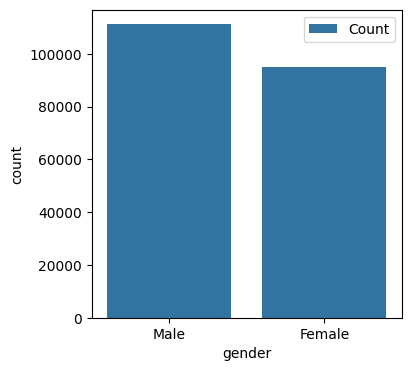

In [ ]:
# Count of Gender
plt.figure(figsize=(4, 4))
sns.countplot(x=cov_cleaned['gender'],label="Count")
plt.show()

In [ ]:
mode = cov_cleaned['gender'].dropna().mode()[0]
mode

'Male'

In [ ]:
cov_cleaned['gender'].fillna(mode, inplace = True)

In [ ]:
cov_cleaned.isna().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [ ]:
cov_cleaned.cough = cov_cleaned.cough.map({0.0:'No', 1.0:'Yes'})
cov_cleaned.fever = cov_cleaned.fever.map({0.0:'No', 1.0:'Yes'})
cov_cleaned.sore_throat = cov_cleaned.sore_throat.map({0.0:'No', 1.0:'Yes'})
cov_cleaned.shortness_of_breath = cov_cleaned.shortness_of_breath.map({0.0:'No', 1.0:'Yes'})
cov_cleaned.head_ache = cov_cleaned.head_ache.map({0.0:'No', 1.0:'Yes'})

In [ ]:
cov_cleaned.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,Yes,No,No,No,No,0.0,No,Male,Other
1,Yes,Yes,No,No,No,0.0,No,Male,Abroad
2,No,Yes,No,No,No,0.0,Yes,Male,Contact with confirmed
3,Yes,Yes,No,No,No,1.0,Yes,Male,Abroad
4,Yes,No,No,No,No,0.0,Yes,Female,Contact with confirmed


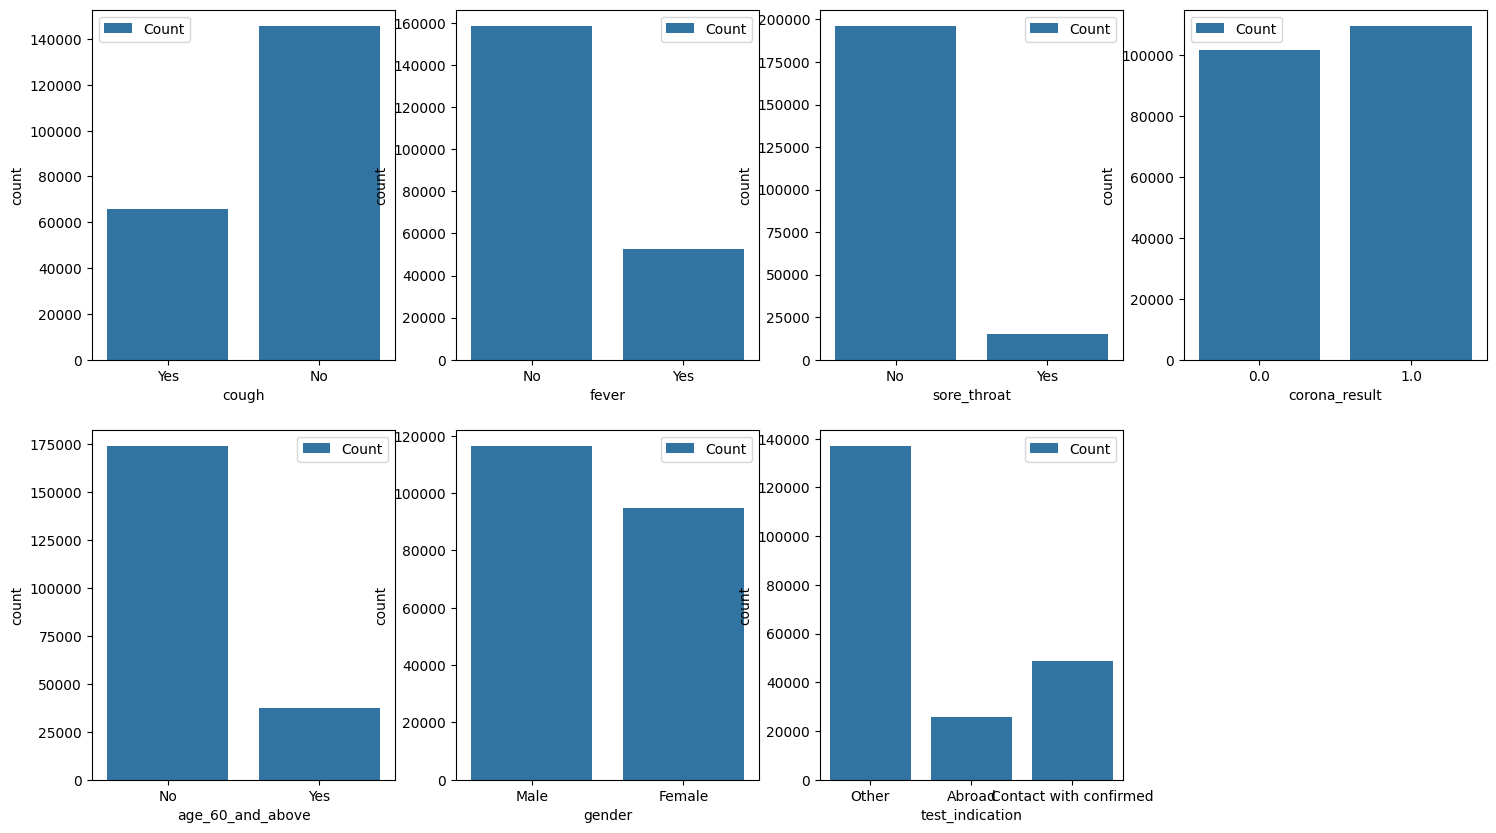

In [ ]:
plt.figure(figsize=(18, 10))
plt.subplot(2,4,1)
sns.countplot(x=cov_cleaned['cough'],label="Count")
plt.subplot(2,4,2)
sns.countplot(x=cov_cleaned['fever'],label="Count")
plt.subplot(2,4,3)
sns.countplot(x=cov_cleaned['sore_throat'],label="Count")
plt.subplot(2,4,4)
sns.countplot(x=cov_cleaned['corona_result'],label="Count")
plt.subplot(2,4,5)
sns.countplot(x=cov_cleaned['age_60_and_above'],label="Count")
plt.subplot(2,4,6)
sns.countplot(x=cov_cleaned['gender'],label="Count")
plt.subplot(2,4,7)
sns.countplot(x=cov_cleaned['test_indication'],label="Count")
plt.show()

### Cat plots

In [ ]:
def plot_cat_columns(column):
    plt.figure(figsize = (10,4))
    plt.subplot(1,2,1)
    sns.barplot(x=column,y='corona_result',data=cov_cleaned,ci = None)

    plt.subplot(1,2,2)
    sns.barplot(x=column,y='corona_result',data=cov_cleaned, hue='test_indication',ci = None)
    plt.legend()
    plt.show()

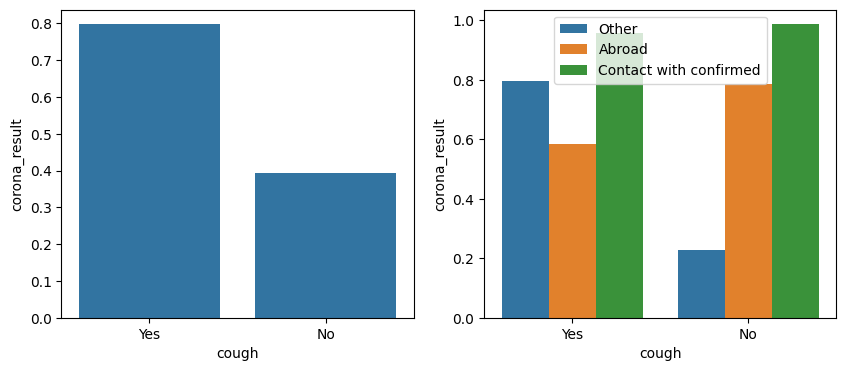

In [ ]:
plot_cat_columns('cough')

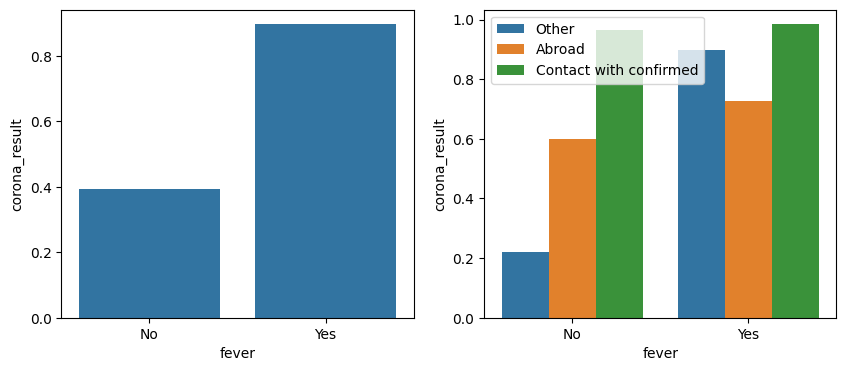

In [ ]:
plot_cat_columns('fever')

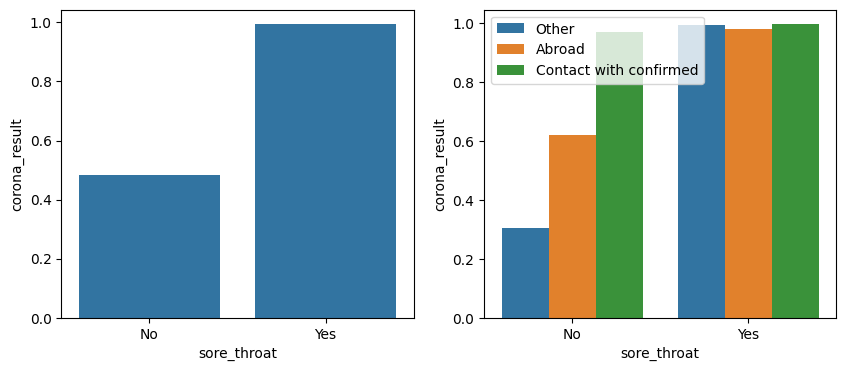

In [ ]:
plot_cat_columns('sore_throat')

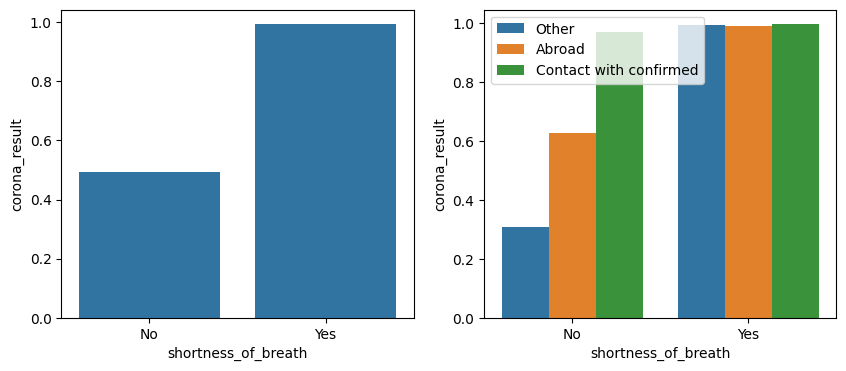

In [ ]:
plot_cat_columns('shortness_of_breath')

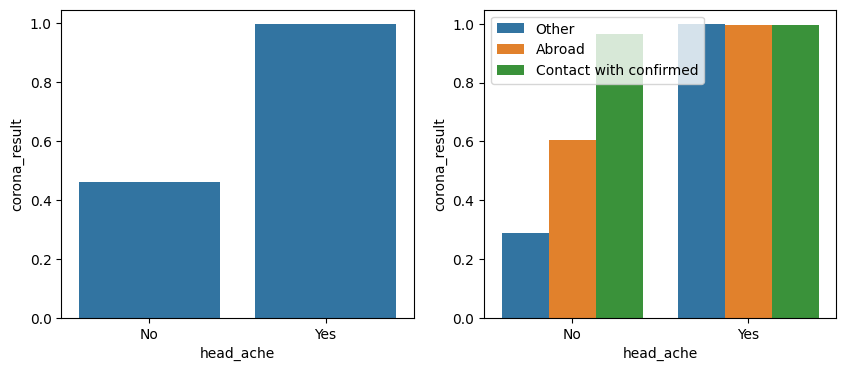

In [ ]:
plot_cat_columns('head_ache')

In [ ]:
cov_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211186 entries, 0 to 211428
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   cough                211186 non-null  object 
 1   fever                211186 non-null  object 
 2   sore_throat          211186 non-null  object 
 3   shortness_of_breath  211186 non-null  object 
 4   head_ache            211186 non-null  object 
 5   corona_result        211186 non-null  float64
 6   age_60_and_above     211186 non-null  object 
 7   gender               211186 non-null  object 
 8   test_indication      211186 non-null  object 
dtypes: float64(1), object(8)
memory usage: 16.1+ MB


In [ ]:
cov_cleaned.cough = cov_cleaned.cough.replace({'No': 0.0, 'Yes': 1.0})
cov_cleaned.fever = cov_cleaned.fever.replace({'No': 0.0, 'Yes': 1.0})
cov_cleaned.sore_throat = cov_cleaned.sore_throat.replace({'No': 0.0, 'Yes': 1.0})
cov_cleaned.shortness_of_breath = cov_cleaned.shortness_of_breath.replace({'No': 0.0, 'Yes': 1.0})
cov_cleaned.head_ache = cov_cleaned.head_ache.replace({'No': 0.0, 'Yes': 1.0})

In [ ]:
cov_cleaned.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,1.0,0.0,0.0,0.0,0.0,0.0,No,Male,Other
1,1.0,1.0,0.0,0.0,0.0,0.0,No,Male,Abroad
2,0.0,1.0,0.0,0.0,0.0,0.0,Yes,Male,Contact with confirmed
3,1.0,1.0,0.0,0.0,0.0,1.0,Yes,Male,Abroad
4,1.0,0.0,0.0,0.0,0.0,0.0,Yes,Female,Contact with confirmed


In [ ]:
cov_cleaned.age_60_and_above = cov_cleaned.age_60_and_above.map({'No': 0.0, 'Yes': 1.0})
cov_cleaned.gender = cov_cleaned.gender.map({'Female': 0.0, 'Male': 1.0})
cov_cleaned.test_indication = cov_cleaned.test_indication.map({'Other': 0.0, 'Abroad': 1.0, 'Contact with confirmed': 2.0})

In [ ]:
cov_cleaned.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
3,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0


In [ ]:
cov_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211186 entries, 0 to 211428
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   cough                211186 non-null  float64
 1   fever                211186 non-null  float64
 2   sore_throat          211186 non-null  float64
 3   shortness_of_breath  211186 non-null  float64
 4   head_ache            211186 non-null  float64
 5   corona_result        211186 non-null  float64
 6   age_60_and_above     211186 non-null  float64
 7   gender               211186 non-null  float64
 8   test_indication      211186 non-null  float64
dtypes: float64(9)
memory usage: 16.1 MB


### Typecasting - Numerical into Categorical

In [ ]:
columns_to_convert = ['cough', 'fever', 'sore_throat', 'shortness_of_breath',
                      'head_ache', 'corona_result', 'age_60_and_above',
                      'gender', 'test_indication']

In [ ]:
cov_cleaned[columns_to_convert] = cov_cleaned[columns_to_convert].astype('category')

In [ ]:
cov_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211186 entries, 0 to 211428
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   cough                211186 non-null  category
 1   fever                211186 non-null  category
 2   sore_throat          211186 non-null  category
 3   shortness_of_breath  211186 non-null  category
 4   head_ache            211186 non-null  category
 5   corona_result        211186 non-null  category
 6   age_60_and_above     211186 non-null  category
 7   gender               211186 non-null  category
 8   test_indication      211186 non-null  category
dtypes: category(9)
memory usage: 3.4 MB


## Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = cov_cleaned.drop(['corona_result'], axis=1)
y = cov_cleaned['corona_result']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

#### Prediction of the LR Model

In [ ]:
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

### Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

results = confusion_matrix(y_test, y_pred_test)
print ("Confusion Matrix of test data:")
print(results)

Confusion Matrix of test data:
[[17921  2459]
 [ 4063 17795]]


In [ ]:
rep = classification_report(y_test, y_pred_test)
print ("Report of test data:")
print(rep)

Report of test data:
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85     20380
         1.0       0.88      0.81      0.85     21858

    accuracy                           0.85     42238
   macro avg       0.85      0.85      0.85     42238
weighted avg       0.85      0.85      0.85     42238



In [ ]:
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))

Accuracy of Logistic regression classifier on test set: 0.85


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Clf = DecisionTreeClassifier()

In [ ]:
Clf.fit(X_train, y_train)

DecisionTreeClassifier()

### Prediction

In [ ]:
y_pred1_test = Clf.predict(X_test)
y_pred1_train = Clf.predict(X_train)

### Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

results_dt = confusion_matrix(y_test, y_pred1_test)

print ("Confusion Matrix of test data:")
print(results_dt)

Confusion Matrix of test data:
[[18440  1940]
 [ 4068 17790]]


In [ ]:
rep_dt = classification_report(y_test, y_pred1_test)
print ("Report of test data:")
print(rep_dt)

Report of test data:
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86     20380
         1.0       0.90      0.81      0.86     21858

    accuracy                           0.86     42238
   macro avg       0.86      0.86      0.86     42238
weighted avg       0.86      0.86      0.86     42238



#### Checking the overfitting for Logistic Regression

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

rep = classification_report(y_train, y_pred_train)
print ("Report of train data:")
print(rep)

print("-----------------------------------------------------------")

rep = classification_report(y_test, y_pred_test)
print ("Report of test data:")
print(rep)

Report of train data:
              precision    recall  f1-score   support

         0.0       0.81      0.88      0.85     81246
         1.0       0.88      0.81      0.85     87702

    accuracy                           0.85    168948
   macro avg       0.85      0.85      0.85    168948
weighted avg       0.85      0.85      0.85    168948

-----------------------------------------------------------
Report of test data:
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85     20380
         1.0       0.88      0.81      0.85     21858

    accuracy                           0.85     42238
   macro avg       0.85      0.85      0.85     42238
weighted avg       0.85      0.85      0.85     42238



#### Checking the overfitting for Decision Tree

In [ ]:
rep_dt = classification_report(y_train, y_pred1_train)
print ("Report of train data:")
print(rep_dt)

print("-----------------------------------------------------------")

rep_dt = classification_report(y_test, y_pred1_test)
print ("Report of test data:")
print(rep_dt)

Report of train data:
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86     81246
         1.0       0.90      0.81      0.86     87702

    accuracy                           0.86    168948
   macro avg       0.86      0.86      0.86    168948
weighted avg       0.86      0.86      0.86    168948

-----------------------------------------------------------
Report of test data:
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86     20380
         1.0       0.90      0.81      0.86     21858

    accuracy                           0.86     42238
   macro avg       0.86      0.86      0.86     42238
weighted avg       0.86      0.86      0.86     42238



#### Evaluation of Logistic Regression & Decision Tree

In [ ]:
print("Logistic Regression Report")
print("--------------------------")
results = confusion_matrix(y_test, y_pred_test)
print ("Confusion Matrix of test data:")
print(results)
rep = classification_report(y_test, y_pred_test)
print ("Report of test data:")
print(rep)

print("-------------------------------------------------------------------------------------------------------------")

print("Decision Tree Report")
print("--------------------------")
results_dt = confusion_matrix(y_test, y_pred1_test)
print ("Confusion Matrix of test data:")
print(results_dt)
rep_dt = classification_report(y_test, y_pred1_test)
print ("Report of test data:")
print(rep_dt)

Logistic Regression Report
--------------------------
Confusion Matrix of test data:
[[17921  2459]
 [ 4063 17795]]
Report of test data:
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85     20380
         1.0       0.88      0.81      0.85     21858

    accuracy                           0.85     42238
   macro avg       0.85      0.85      0.85     42238
weighted avg       0.85      0.85      0.85     42238

-------------------------------------------------------------------------------------------------------------
Decision Tree Report
--------------------------
Confusion Matrix of test data:
[[18440  1940]
 [ 4068 17790]]
Report of test data:
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86     20380
         1.0       0.90      0.81      0.86     21858

    accuracy                           0.86     42238
   macro avg       0.86      0.86      0.86     42238
weighted avg       0.86

# -------------------------------------------------------------------------------------------